# Resampling Methods

## Introduction to resampling methods

In this notebook we will review resampling methods, an extremely useful class of statistical data analysis techniques, which are closely related to the concept of statistical simulation.  

They hav ewide applications in areas like model validation, uncertainty estimation and significance testing.

The underlying concept is that you simulate multiple instances of your dataset by resampling it.

![resampling_workflow](img/resampling_methods_1.png)

In a typical resampling workflow, we start with a dataset. We then apply a resampling method to create a new dataset. We then analyze this dataset to get an estimate for some quantity of interest.

We then repeat this process multiple times to get multiple times to get multuple values for that estimator or quantity of interest. No complicated statistical formulae to remember!

#### Why Resample?

##### Advantages:

- Simple implemeantation procedure
- Applicable to complex estimators
- No strict assumptions

##### Drawbacks:

- Computationlally expensive

### Resampling Methods

Generally speaking, there are three types of reasampling methods.

![resampling_methods](img/resampling_types.png)

**Bootstrapping** is the most common method. It consists resampling from the data with replacement.

**Jackknife resampling** is very similar to bootstrapping, but there is no random sampling. *Instead, one or more observations from the original dataset are systematically excluded in new datasets.* Jackknife resampling methods are quite useful for estiating the bias and variance of estimators.

**Permutation testing** involves switching the labels in the dataset.

Let us review the sampling with a simple example:

### Probability example

In this exercise, we will review the difference between sampling with and without replacement. We will calculate the probability of an event using simulation, but vary our sampling method to see how it impacts probability.

Consider a bowl filled with colored candies - three blue, two green, and five yellow. Draw three candies at random, with replacement and without replacement. You want to know the probability of drawing a yellow candy on the third draw given that the first candy was blue and the second candy was green.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
# Set up the bowl
success_rep, success_no_rep, sims = 0, 0, 10000
bowl = 3*['b']+2*['g']+5*['y']

for i in range(sims):
    # Sample with and without replacement & increment success counters
    sample_rep = np.random.choice(bowl, replace=True, size=3)
    sample_no_rep = np.random.choice(bowl, replace=False, size=3)
    if (sample_rep[0] == 'b') & (sample_rep[1] == 'g') \
            & (sample_rep[2] == 'y'): 
        success_rep += 1
    if (sample_no_rep[0] == 'b') & (sample_no_rep[1] == 'g') \
            & (sample_no_rep[2] == 'y'): 
        success_no_rep += 1

# Calculate probabilities
print("Probability with replacement = {}, without replacement = {}"\
      .format(success_rep/sims, success_no_rep/sims))

Probability with replacement = 0.0316, without replacement = 0.0408


## Bootstrapping

Now, let's focus on the most common method: Bootstrapping.  
The name bootstrapping basically refers to the fact that we use the existing dataset to simulate multiple different dataset.

Assume that you have received a box of Easter Eggs and find that the eggs have the following weights:

20, 20, 20, 20
50  
70, 70, 70  
80  
90

From this sample, we can easily calculate the following:

In [2]:
eggs = np.array([20]*4+[50]*1+[70]*3+[80]+[90])
egg_mean = eggs.mean()
eggs_std = eggs.std()
eggs_std_err = eggs_std / np.sqrt(len(eggs))

c:\users\berk_\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


Text(0.5, 1.0, 'Population Distribution of Easter Egg Weights')

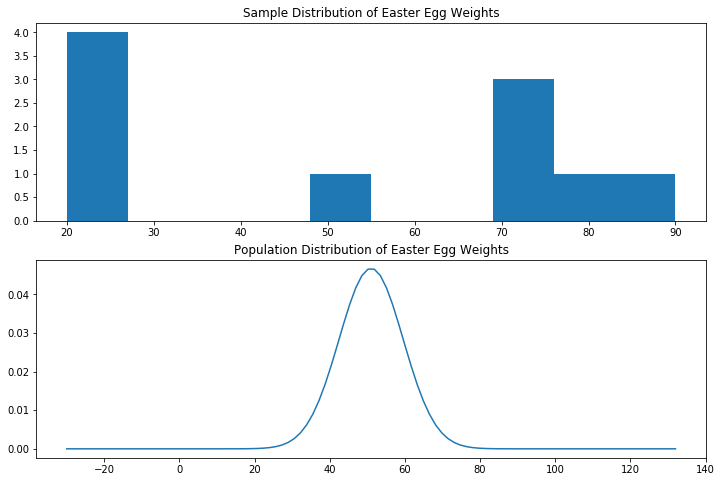

In [3]:
X = np.linspace(egg_mean - 3*eggs_std, egg_mean + 3*eggs_std, 100)
fig, axes = plt.subplots(2, 1, figsize=(12,8))
axes[0].hist(eggs)
axes[0].set_title('Sample Distribution of Easter Egg Weights')
axes[1].plot(X, mlab.normpdf(X, egg_mean, eggs_std_err))
axes[1].set_title('Population Distribution of Easter Egg Weights')


In [4]:
from scipy.stats import norm
print('2.5 percentile for eggs: %.2f' % norm.ppf(.025, egg_mean, eggs_std_err))
print('97.5 percentile for eggs: %.2f' % norm.ppf(.975, egg_mean, eggs_std_err))

2.5 percentile for eggs: 34.27
97.5 percentile for eggs: 67.73


We went from a sample distribution to population dustribution.

However, there are hidden assumptions in this calculation.    
We assumed that:
- the disribution of weights is normal,
- the confidence interval was symmetric,

Both of these might not be reasonable assumptions.

What should we do in this case?

One approach is to take a bootstrapped sample by sampling with replacement from the original sample.

![bootstrapping](img/bootstrapping.jpg)

In our case, this means that 
- each of the ten eggs have an equal probability of being picked.   
And since it is with replacement, 
- each egg has an equal probability of being picked subsequentially, as well.

**When bootstrapping, it is good to know that:**
- **Run at least 5-10k iterations** with the number of observations at least equal to the number of observations in the original sample
- **Expect an approximate answer.** Bootstrapping is a random simulation.
- **Consider bias correction.** Some bootstrapped statistics, especially concerning dispersion of the data like standard deviation tend to be inhenrently biased.

TODO : Look up *balanced bootstrap*

## Running a Simple Bootstrap

We will work through an example where we learn to run a simple bootstrap. As we saw in the video, the main idea behind bootstrapping is sampling with replacement.

Suppose you own a factory that produces wrenches. You want to be able to characterize the average length of the wrenches and ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use bootstrapping to get the 95% confidence interval (CI) for the average lengths.

### Instructions:
0. Load `wrench_lengths` from `data/wrench_lengths.pk`.
1. Draw a random sample with replacement from `wrench_lengths` and store it in `temp_sample`. Set `size = len(wrench_lengths)`.  
2. Calculate the mean length of each sample, assign it to `sample_mean`, and then append it to `mean_lengths`.  
3. Calculate the bootstrapped mean and bootstrapped 95% confidence interval by using `np.percentile()`.

In [5]:
import numpy as np
import pickle
wrench_lengths = pickle.load(open('data/wrench_lengths.pk','rb'))
# Draw some random sample with replacement and append mean to mean_lengths.
mean_lengths, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(wrench_lengths, replace=True, size=len(wrench_lengths))
    sample_mean = temp_sample.mean()
    mean_lengths.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(np.mean(mean_lengths), np.percentile(mean_lengths, [2.5, 97.5])))

Bootstrapped Mean Length = 10.0230723376411, 95% CI = [ 9.78625299 10.25166081]


## Non-standard Estimators

In the last exercise, we ran a simple bootstrap that we will now modify for more complicated estimators.

Suppose you are studying the health of students. You are given the height and weight of 1000 students and are interested in the median height as well as the correlation between height and weight and the associated 95% CI for these quantities. Let's use bootstrapping.

Examine the pandas DataFrame df with the heights and weights of 1000 students. Using this, calculate the 95% CI for both the median height as well as the correlation between height and weight.

### Instructions:

0. Load `DataFrame` from `data/student_data.csv'.
1. Use the `.sample()` method on `df` to generate a sample of the data with replacement and assign it to `tmp_df`.
2. For each generated dataset in `tmp_df`, calculate the median heights and correlation between heights and weights using `.median()` and `.corr()`.
3. Append the median heights to `height_medians` and correlation to `hw_corr`.
4. Finally calculate the 95% confidence intervals for each of the above quantities using `np.percentile()`.

In [6]:
import pandas as pd
df = pd.read_csv('data/student_data.csv')
# Sample with replacement and calculate quantities of interest
sims, data_size, height_medians, hw_corr = 1000, df.shape[0], [], []
for i in range(sims):
    tmp_df = df.sample(n=data_size, replace=True)
    height_medians.append(tmp_df['heights'].median())
    hw_corr.append(tmp_df.corr()['heights']['weights'])

# Calculate confidence intervals
print("Height Median CI = {} \nHeight Weight Correlation CI = {}".format(np.percentile(height_medians, [2.5, 97.5]).round(4) ,
                                                                         np.percentile(hw_corr, [2.5, 97.5]).round(4)))

Height Median CI = [5.5513 5.8642] 
Height Weight Correlation CI = [0.9325 0.9463]


## Bootstrapping Regression

Now let's see how bootstrapping works with regression. Bootstrapping helps estimate the uncertainty of non-standard estimators. Consider the $R^2$ statistic associated with a regression. When you run a simple least squares regression, you get a value for $R^2$. But let's see how can we get a 95% CI for $R^2$.

Examine the DataFrame `df` with a dependent variable `y` and two independent variables `X1` and `X2` using `df.head()`. We've already fit this regression with statsmodels (sm) using:

`reg_fit = sm.OLS(df['y'], df.iloc[:,1:]).fit()`  

Examine the result using `reg_fit.summary()` to find that $R^2=0.3504$. Use bootstrapping to calculate the 95% CI.

In [7]:
import statsmodels.formula.api as sm

df = pd.read_csv('data/reg_dataset.csv')
rsquared_boot, coefs_boot, sims = [], [], 1000
reg_fit = sm.OLS(df['y'], df.iloc[:,1:]).fit()

# Run 1K iterations
for i in range(sims):
    # First create a bootstrap sample with replacement with n=df.shape[0]
    bootstrap = df.sample(n=df.shape[0], replace=True)
    # Fit the regression and append the r square to rsquared_boot
    rsquared_boot.append(sm.OLS(bootstrap['y'],bootstrap.iloc[:,1:]).fit().rsquared)

# Calculate 95% CI on rsquared_boot
print("R Squared 95% CI = {}".format(np.percentile(rsquared_boot, [2.5, 97.5]).round(3)))

R Squared 95% CI = [0.273 0.366]


# Jackknife resampling

### Jackknife Estimate:

![jackknife estimate](img/jackknife_estimate.jpg)


### Variance of Jackknife Estimate:

![jackknife_var](img/jackknife_var.jpg)

## Basic Jackknife estimation - mean

Jackknife resampling is an older procedure, which isn't used as often compared as bootstrapping. However, it's still useful to know how to run a basic jackknife estimation procedure. In this first exercise, we will calculate the jackknife estimate for the mean. Let's return to the wrench factory.

You own a wrench factory and want to measure the average length of the wrenches to ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use jackknife estimation to get the average lengths.

Examine the variable `wrench_lengths` in the shell.

In [8]:
wrench_lengths = pickle.load(open('data/wrench_lengths.pk','rb'))
# Leave one observation out from wrench_lengths to get the jackknife sample and store the mean length
mean_lengths, n = [], len(wrench_lengths)
index = np.arange(n)

for i in range(n):
    jk_sample = wrench_lengths[index != i]
    mean_lengths.append(jk_sample.mean())

# The jackknife estimate is the mean of the mean lengths from each sample
mean_lengths = np.array(mean_lengths)
print("Jackknife estimate of the mean = {:.3f}".format(mean_lengths.mean()))

Jackknife estimate of the mean = 10.027


## Jackknife confidence interval for the median

In this exercise, we will calculate the jackknife 95% CI for a non-standard estimator. Here, we will look at the median. Keep in mind that the variance of a jackknife estimator is n-1 times the variance of the individual jackknife sample estimates where n is the number of observations in the original sample.

Returning to the wrench factory, you are now interested in estimating the median length of the wrenches along with a 95% CI to ensure that the wrenches are within tolerance.

Let's revisit the code from the previous exercise, but this time in the context of median lengths. By the end of this exercise, you will have a much better idea of how to use jackknife resampling to calculate confidence intervals for non-standard estimators.

In [9]:
# Leave one observation out to get the jackknife sample and store the median length
median_lengths = []
for i in range(n):
    jk_sample = wrench_lengths[index != i]
    median_lengths.append(np.median(jk_sample))

median_lengths = np.array(median_lengths)

# Calculate jackknife estimate and it's variance
jk_median_length = np.mean(median_lengths)
jk_var = (n-1)*np.var(median_lengths)

# Assuming normality, calculate lower and upper 95% confidence intervals
print("Jackknife 95% CI lower = {:.3f}, upper = {:.3f}".format(jk_median_length - 1.96 * np.sqrt(jk_var),
                                                       jk_median_length + 1.96 * np.sqrt(jk_var)))

Jackknife 95% CI lower = 9.139, upper = 10.755
